<a href="https://colab.research.google.com/github/Nagarajudatascience/Machine-Learning/blob/main/Bike_Rental_count_Predictions_H2O_Auto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Back Ground of project


# Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

# Understanding dataset

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# **1. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


# **2. Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Source files/Bike Rental Predictions/Project Code and Files/day.csv')

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


# **3. Data Analysis & Cleaning**

In [ ]:
df.shape

(731, 16)

In [ ]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Lets rename the columns for better understanding

In [ ]:
df.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [ ]:
df.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Let us convert our Data types of variables to the significant category

In [ ]:
df['datetime']=pd.to_datetime(df.datetime)
df['season']=df.season.astype('category')
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weather_condition']=df.weather_condition.astype('category')

In [ ]:
df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
holiday                    category
weekday                    category
workingday                 category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [ ]:
df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Handling Missing Values

In [ ]:
df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

### Let us see how the different months and seasons affect the rental counts

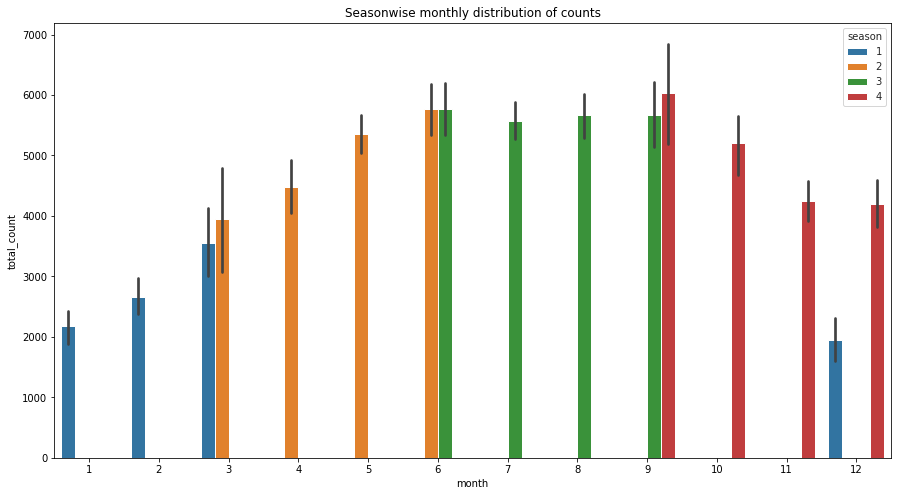

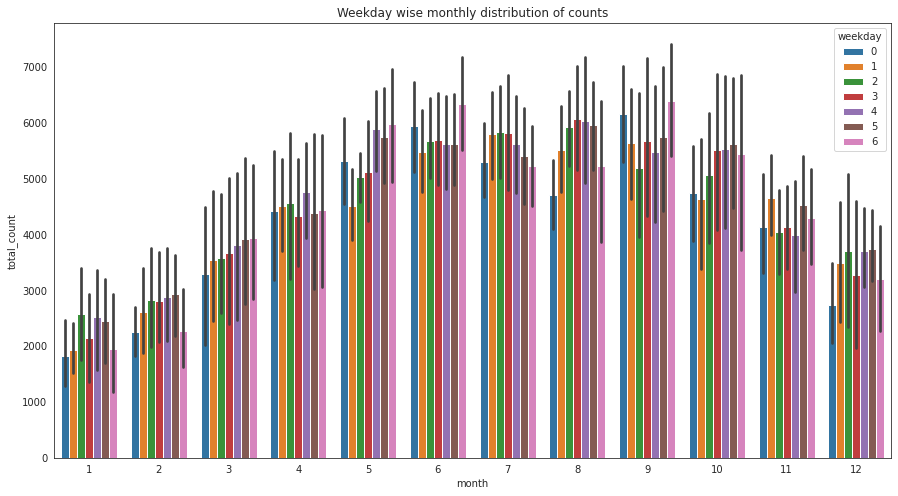

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=df[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=df[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show()

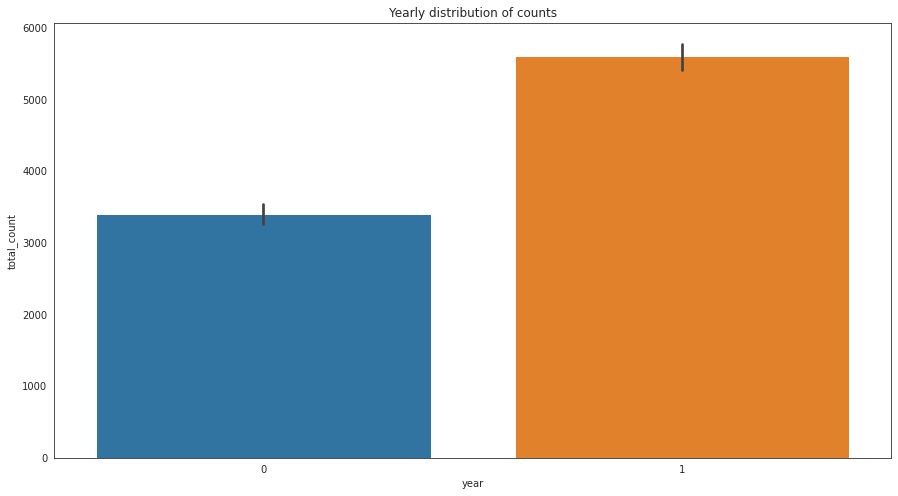

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.barplot(x='year',y='total_count',data=df[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

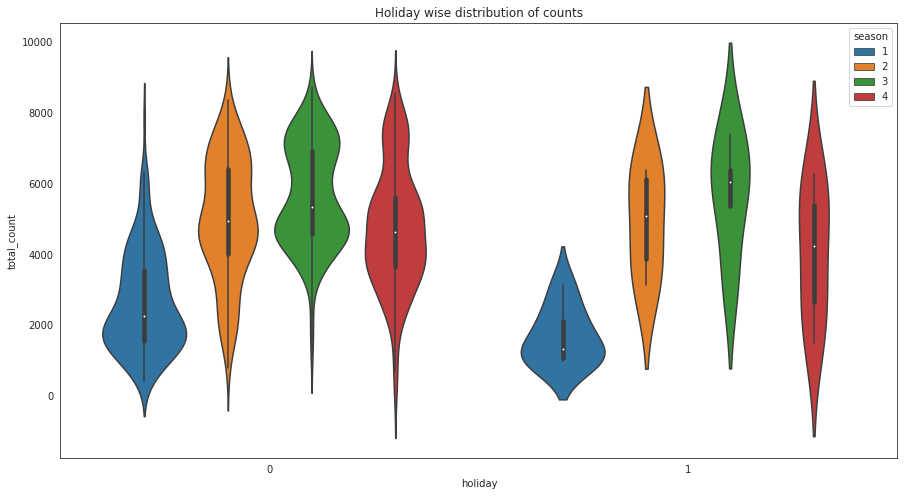

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.violinplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

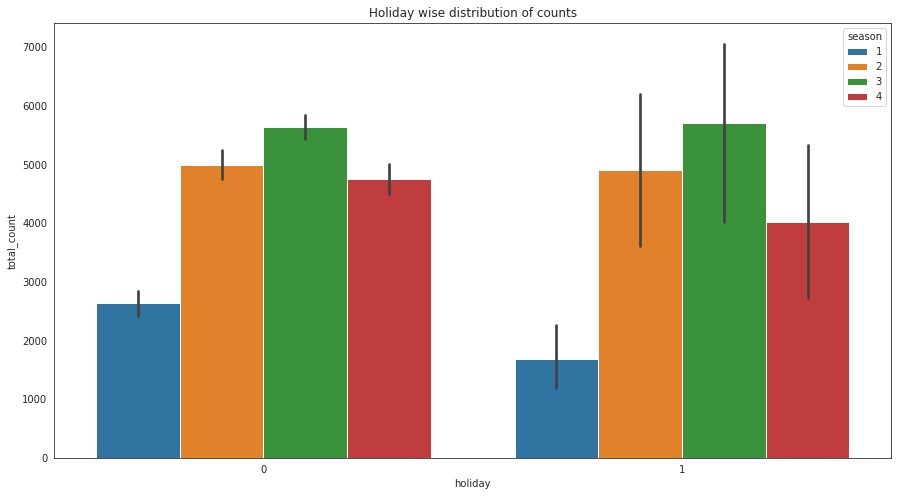

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=df,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

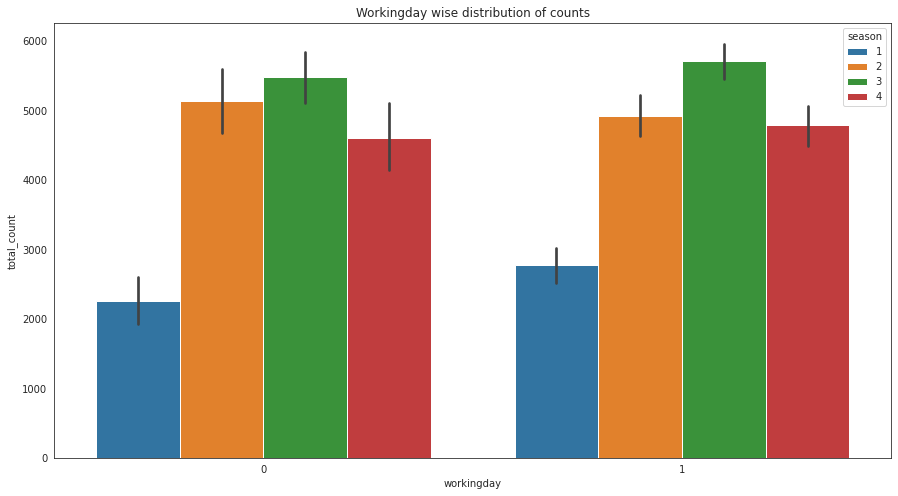

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

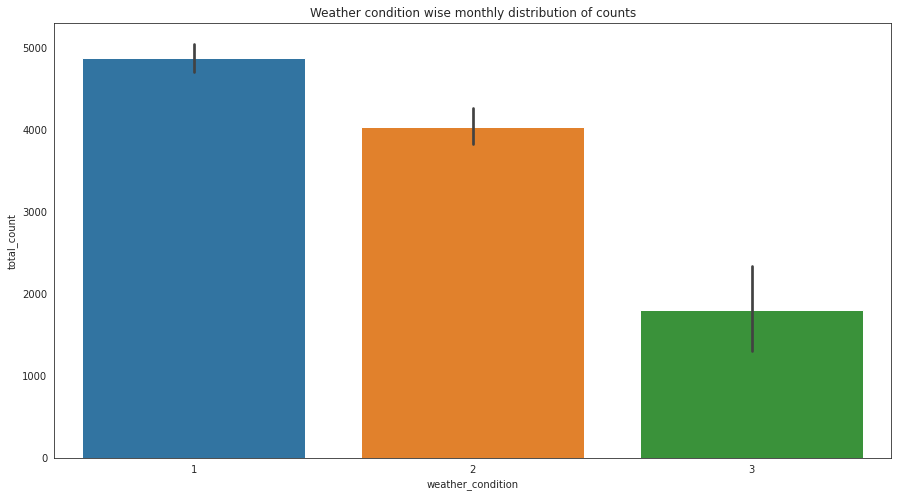

In [ ]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=df[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather condition wise monthly distribution of counts')
plt.show()

### Outlier Analysis

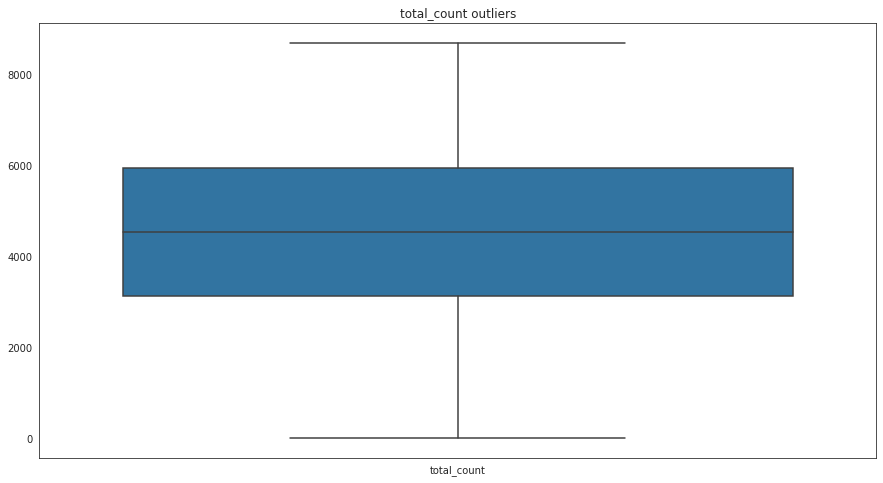

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['total_count']])
ax.set_title('total_count outliers')
plt.show()

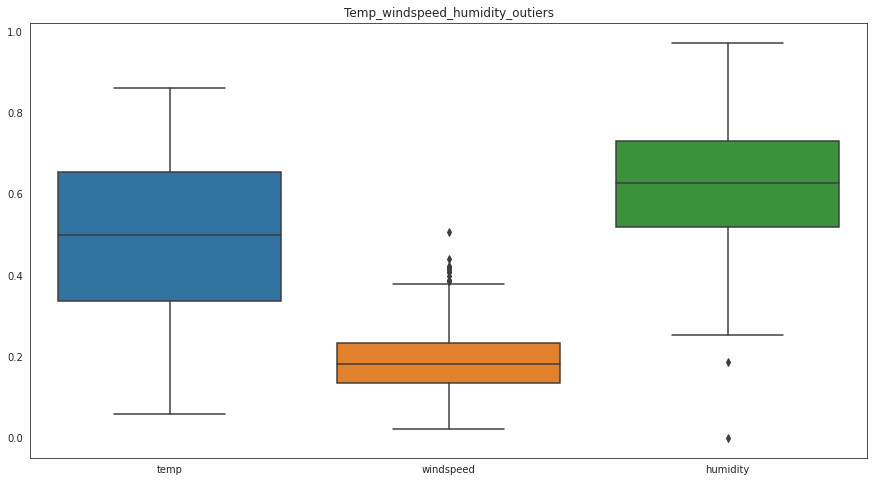

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

### Plotting Q-Q Plot

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab) # Q-Q plot is combination for probplot and distribution graph
    plt.show()

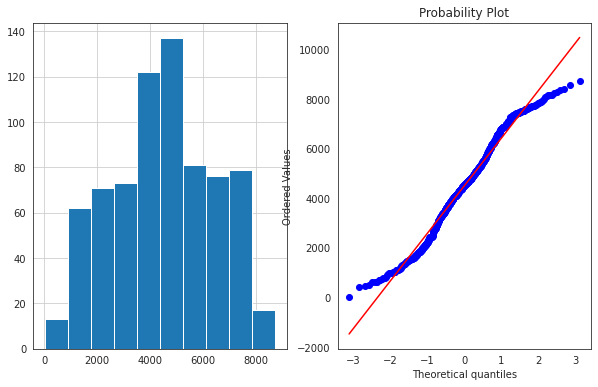

In [ ]:
plot_curve(df,'total_count')

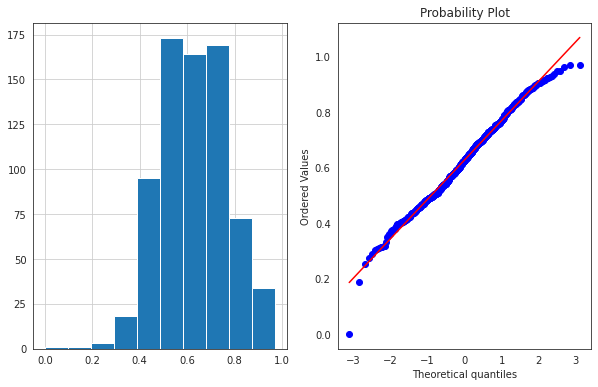

In [ ]:
plot_curve(df,'humidity')

### Co Relation Matrix

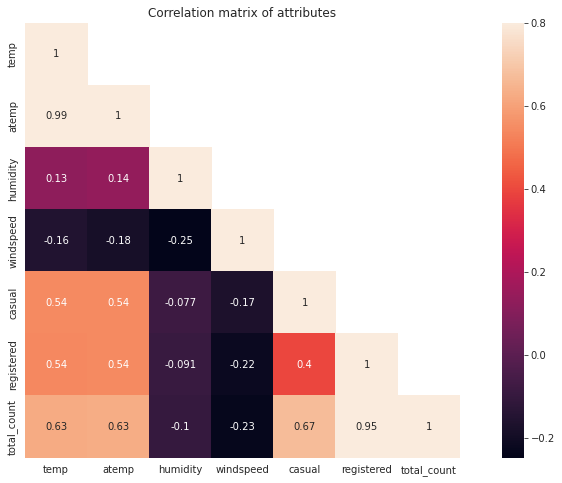

In [ ]:
correMtr=df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

# **4. Data Preprocessing**

In [ ]:
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

### One Hot Encoding

In [ ]:
encoded_df =pd.get_dummies(df,columns=cat_attributes)
print('Shape of transfomed dataframe::',encoded_df.shape)
encoded_df.head()

Shape of transfomed dataframe:: (731, 24)


,rec_id,datetime,month,weekday,temp,atemp,humidity,windspeed,casual,registered,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,2011-01-01,1,6,0.344167,0.363625,0.805833,0.160446,331,654,...,0,1,0,1,0,0,1,0,1,0
1,2,2011-01-02,1,0,0.363478,0.353739,0.696087,0.248539,131,670,...,0,1,0,1,0,0,1,0,1,0
2,3,2011-01-03,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,...,0,1,0,0,1,1,0,0,1,0
3,4,2011-01-04,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,...,0,1,0,0,1,1,0,0,1,0
4,5,2011-01-05,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,...,0,1,0,0,1,1,0,0,1,0


In [ ]:
encoded_df=encoded_df.drop('datetime',axis=1)

In [ ]:
encoded_df

,rec_id,month,weekday,temp,atemp,humidity,windspeed,casual,registered,total_count,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,1,6,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,1,0,1,0,0,1,0,1,0
1,2,1,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,1,0,1,0,0,1,0,1,0
2,3,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,1,0,0,1,1,0,0,1,0
3,4,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,1,0,0,1,1,0,0,1,0
4,5,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12,4,0.254167,0.226642,0.652917,0.350133,247,1867,2114,...,0,1,0,0,1,0,1,0,0,1
727,728,12,5,0.253333,0.255046,0.590000,0.155471,644,2451,3095,...,0,1,0,0,1,0,1,0,0,1
728,729,12,6,0.253333,0.242400,0.752917,0.124383,159,1182,1341,...,0,1,0,1,0,0,1,0,0,1
729,730,12,0,0.255833,0.231700,0.483333,0.350754,364,1432,1796,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
encoded_df=encoded_df[['rec_id'	,'month'	,'weekday'	,'temp'	,'atemp'	,'humidity',	'windspeed',	'casual',	'registered'		,'season_1',	'season_2'	,'season_3',	'season_4',	'holiday_0'	,'holiday_1'	,'workingday_0',	'workingday_1'	,'weather_condition_1'	,'weather_condition_2'	,'weather_condition_3',	'year_0','year_1','total_count']]

**# 5. Splitting data**

In [ ]:
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [ ]:
x= encoded_df.iloc[:,0:-1] ## Independent Features
y= encoded_df.iloc[:,-1] ## Dependent Varibales

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [ ]:
x

,rec_id,month,weekday,temp,atemp,humidity,windspeed,casual,registered,season_1,...,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,1,1,6,0.344167,0.363625,0.805833,0.160446,331,654,1,...,0,1,0,1,0,0,1,0,1,0
1,2,1,0,0.363478,0.353739,0.696087,0.248539,131,670,1,...,0,1,0,1,0,0,1,0,1,0
2,3,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1,...,0,1,0,0,1,1,0,0,1,0
3,4,1,2,0.200000,0.212122,0.590435,0.160296,108,1454,1,...,0,1,0,0,1,1,0,0,1,0
4,5,1,3,0.226957,0.229270,0.436957,0.186900,82,1518,1,...,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12,4,0.254167,0.226642,0.652917,0.350133,247,1867,1,...,0,1,0,0,1,0,1,0,0,1
727,728,12,5,0.253333,0.255046,0.590000,0.155471,644,2451,1,...,0,1,0,0,1,0,1,0,0,1
728,729,12,6,0.253333,0.242400,0.752917,0.124383,159,1182,1,...,0,1,0,1,0,0,1,0,0,1
729,730,12,0,0.255833,0.231700,0.483333,0.350754,364,1432,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: total_count, Length: 731, dtype: int64

In [ ]:
X_train.shape

(511, 22)

In [ ]:
y_train.shape

(511,)

In [ ]:
X_test.shape

(220, 22)

In [ ]:
y_test.shape

(220,)

In [ ]:
y_train

223    4905
684    5445
685    5698
163    5020
394    3624
       ... 
71     2417
106    3744
270    3907
435    4911
102    2162
Name: total_count, Length: 511, dtype: int64

# **6 . Model Building**

We will be using the following models in our project:                      
Linear Regression                                                           
Random Forest Regressor

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = linreg.predict(X_test)

In [ ]:
lr=linreg.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',linreg.coef_)
print('Model intercept value :',linreg.intercept_)

Accuracy of the model : 1.0
Model coefficients : [ 1.67244685e-15  2.52686760e-13  2.60845968e-14  5.45894408e-12
 -8.21124875e-12 -2.37337000e-13 -5.49263483e-13  1.00000000e+00
  1.00000000e+00 -1.39212543e-14  1.74167058e-14  2.01986117e-14
 -2.36974603e-14 -2.82970204e-14  2.82970204e-14  1.44885501e-14
 -1.44884650e-14  4.83267719e-14  4.20682810e-14 -9.03947107e-14
  3.88267760e-13 -3.88274699e-13]
Model intercept value : 4.547473508864641e-12


In [ ]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 2.7544247910195063e-12
Mean absolute error : 2.3290298982332886e-12


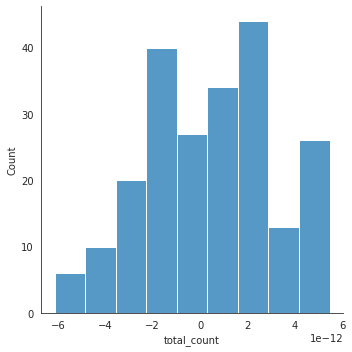

In [ ]:
sns.displot(y_test-pred)

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(n_estimators=200)

In [ ]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.9992877586732264


In [ ]:
rf_pred=rf.predict(X_test)

In [ ]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 102.73448483281373
Mean absolute error : 66.93313636363636


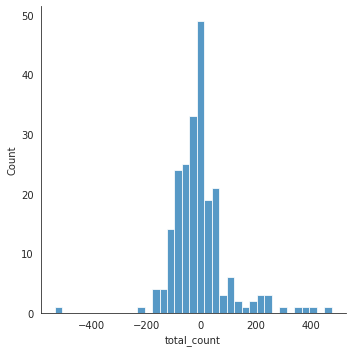

In [ ]:
sns.displot(y_test-rf_pred)

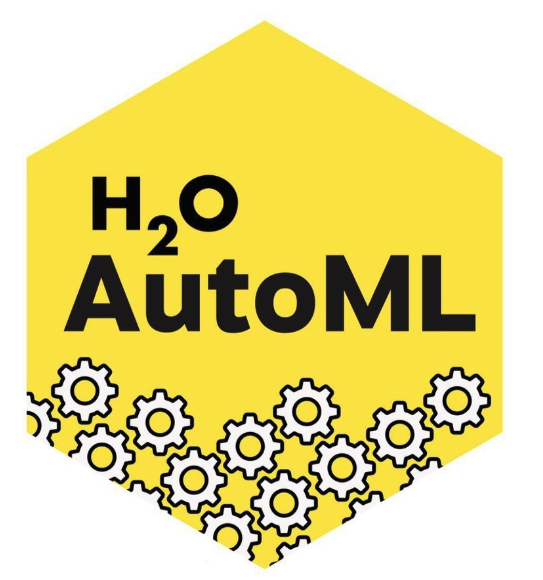

H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install h2o

     |████████████████████████████████| 176.2 MB 81 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.3-py2.py3-none-any.whl size=176244303 sha256=9188b003ecbd91d19031668063ef40b5b4cfab015a389c7763b3da31868eb8f2
  Stored in directory: /root/.cache/pip/wheels/b5/71/a5/02087a05e5644158183e1c58eeae3f9356a4d1e80659fb2dfb
Successfully built h2o


## Importing the H2O Python module and H2OAutoML class

In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14" 2022-01-18; OpenJDK Runtime Environment (build 11.0.14+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.14+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpuy5drx2s
  JVM stdout: /tmp/tmpuy5drx2s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpuy5drx2s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_unknownUser_pbgge7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Loading the data

In [ ]:
df = h2o.import_file("/content/drive/MyDrive/Source files/Bike Rental Predictions/Project Code and Files/day.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
6,2011-01-06 00:00:00,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606
7,2011-01-07 00:00:00,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
8,2011-01-08 00:00:00,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,68,891,959
9,2011-01-09 00:00:00,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,2011-01-10 00:00:00,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## H2O auto ml can do all the data preprocessing techniques

In [ ]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [ ]:
df_train

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
4,2011-01-04 00:00:00,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,82,1518,1600
7,2011-01-07 00:00:00,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
9,2011-01-09 00:00:00,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,54,768,822
10,2011-01-10 00:00:00,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321
11,2011-01-11 00:00:00,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263
12,2011-01-12 00:00:00,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162
13,2011-01-13 00:00:00,1,0,1,0,4,1,1,0.165,0.150883,0.470417,0.301,38,1368,1406
16,2011-01-16 00:00:00,1,0,1,0,0,0,1,0.231667,0.234217,0.48375,0.188433,251,953,1204


In [ ]:
y = "cnt"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('casual')
x.remove('registered')

Defining the model

In [ ]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

Fitting the model

In [ ]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
11:46:40.959: Project: AutoML_1_20220315_114640
11:46:40.969: Setting stopping tolerance adaptively based on the training frame: 0.04170288281141495
11:46:40.969: Build control seed: 10
11:46:40.970: training frame: Frame key: AutoML_1_20220315_114640_training_py_3_sid_95d6    cols: 16    rows: 575  chunks: 1    size: 22044  checksum: -29723163976657925
11:46:40.970: validation frame: NULL
11:46:40.970: leaderboard frame: NULL
11:46:40.971: blending frame: NULL
11:46:40.971: response column: cnt
11:46:40.971: fold column: null
11:46:40.971: weights column: null
11:46:41.9: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2 (5g, 3

Seeing the Leaderboard

In [ ]:
lb = aml.leaderboard

In [ ]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_6_AutoML_1_20220315_114640,396566,629.735,396566,437.543,0.233876
StackedEnsemble_BestOfFamily_2_AutoML_1_20220315_114640,397894,630.789,397894,438.057,0.234197
StackedEnsemble_BestOfFamily_3_AutoML_1_20220315_114640,397954,630.836,397954,440.101,0.23249
StackedEnsemble_AllModels_5_AutoML_1_20220315_114640,399025,631.684,399025,440.696,0.234255
StackedEnsemble_AllModels_1_AutoML_1_20220315_114640,399450,632.021,399450,442.117,0.235155
StackedEnsemble_AllModels_2_AutoML_1_20220315_114640,402826,634.686,402826,441.598,0.23635
GBM_3_AutoML_1_20220315_114640,421172,648.978,421172,448.15,0.245584
GBM_2_AutoML_1_20220315_114640,423485,650.757,423485,447.877,0.247078
GBM_4_AutoML_1_20220315_114640,442246,665.016,442246,454.859,0.251078
XGBoost_2_AutoML_1_20220315_114640,443270,665.785,443270,473.075,0.233146


Getting all the model ids

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
model_ids

['StackedEnsemble_BestOfFamily_6_AutoML_1_20220315_114640',
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20220315_114640',
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20220315_114640',
 'StackedEnsemble_AllModels_5_AutoML_1_20220315_114640',
 'StackedEnsemble_AllModels_1_AutoML_1_20220315_114640',
 'StackedEnsemble_AllModels_2_AutoML_1_20220315_114640',
 'GBM_3_AutoML_1_20220315_114640',
 'GBM_2_AutoML_1_20220315_114640',
 'GBM_4_AutoML_1_20220315_114640',
 'XGBoost_2_AutoML_1_20220315_114640',
 'StackedEnsemble_AllModels_4_AutoML_1_20220315_114640',
 'DRF_1_AutoML_1_20220315_114640',
 'XRT_1_AutoML_1_20220315_114640',
 'StackedEnsemble_BestOfFamily_5_AutoML_1_20220315_114640',
 'XGBoost_3_AutoML_1_20220315_114640',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220315_114640',
 'XGBoost_1_AutoML_1_20220315_114640',
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20220315_114640',
 'StackedEnsemble_AllModels_3_AutoML_1_20220315_114640',
 'GBM_1_AutoML_1_20220315_114640',
 'GLM_1_AutoML_1_20220315_11

In [ ]:
aml.leader.model_performance(df_test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 440568.81425697537
RMSE: 663.7535794682959
MAE: 432.82461399558935
RMSLE: 0.4540744338099434
R^2: 0.8850528094325861
Mean Residual Deviance: 440568.81425697537
Null degrees of freedom: 155
Residual degrees of freedom: 151
Null deviance: 604186730.3302801
Residual deviance: 68728735.02408816
AIC: 2482.057043545168


Getting the model details for best performing model

In [ ]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_6_AutoML_1_20220315_114640

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 41717.98272231844
RMSE: 204.24980470570452
MAE: 147.24007207671468
RMSLE: 0.08557018951471274
R^2: 0.988773348246066
Mean Residual Deviance: 41717.98272231844
Null degrees of freedom: 574
Residual degrees of freedom: 570
Null deviance: 2136686929.5582597
Residual deviance: 23987840.065333102
AIC: 7761.024657409773

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 396565.9124902638
RMSE: 629.7347953625111
MAE: 437.54340566338504
RMSLE: 0.23387644829977652
R^2: 0.893280856204309
Mean Residual Deviance: 396565.9124902638
Null degrees of freedom: 574
Residual degrees of freedom: 570
Null deviance: 2145191465.164504
Residual deviance: 228025399.6819017
AIC: 9055.872899852746


In [ ]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_1_20220315_114640',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_2_AutoML_1_20220315_114640',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'DRF_1_AutoML_1_20220315_114640',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XRT_1_AutoML_1_20220315_114640',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GLM_1_AutoML

In [ ]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_6_AutoML_1_20220315_114640

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 41717.98272231844
RMSE: 204.24980470570452
MAE: 147.24007207671468
RMSLE: 0.08557018951471274
R^2: 0.988773348246066
Mean Residual Deviance: 41717.98272231844
Null degrees of freedom: 574
Residual degrees of freedom: 570
Null deviance: 2136686929.5582597
Residual deviance: 23987840.065333102
AIC: 7761.024657409773

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 396565.9124902638
RMSE: 629.7347953625111
MAE: 437.54340566338504
RMSLE: 0.23387644829977652
R^2: 0.893280856204309
Mean Residual Deviance: 396565.9124902638
Null degrees of freedom: 574
Residual degrees of freedom: 570
Null deviance: 2145191465.164504
Residual deviance: 228025399.6819017
AIC: 9055.872899852746


In [ ]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred

predict
1522.46
1330.57
1302.1
1146.27
1211.83
1519.8
1462.27
918.66
1239.05
1436.52
